In [36]:
import pandas as pd

data = pd.read_csv('../one_hot_encoded_data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [37]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,debt_settlement_flag_N,debt_settlement_flag_Y,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,settlement_status_No,next_pymnt_d_Apr-2019,next_pymnt_d_Feb-2019,next_pymnt_d_Mar-2019,next_pymnt_d_Unkown
0,10000.0,10000.0,10000.0,4.0,307.27,10.0,55000.0,Current,19.22,0.0,...,1,0,0,0,0,1,0,0,1,0
1,35000.0,35000.0,35000.0,18.0,770.63,10.0,200000.0,Current,17.80,1.0,...,1,0,0,0,0,1,0,0,1,0
2,9600.0,9600.0,9600.0,8.0,300.13,3.0,90000.0,Current,25.59,1.0,...,1,0,0,0,0,1,0,0,1,0
3,18000.0,18000.0,18000.0,6.0,557.52,10.0,70000.0,Current,5.55,0.0,...,1,0,0,0,0,1,0,0,1,0
4,12000.0,12000.0,12000.0,10.0,378.59,3.0,36500.0,Current,33.61,0.0,...,1,0,0,0,0,1,0,0,1,0


In [38]:
# convert one-hot encoded features to float type

for i in list(data.columns):
    if data[i].dtype == 'int64':
        data[i] = data[i].astype('float')

In [39]:
data_target = data['loan_status']
data.drop('loan_status', inplace=True, axis=1)
data_input = data

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

y = label_binarize(data_target, classes=['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)


In [45]:
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [42]:
y_score

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

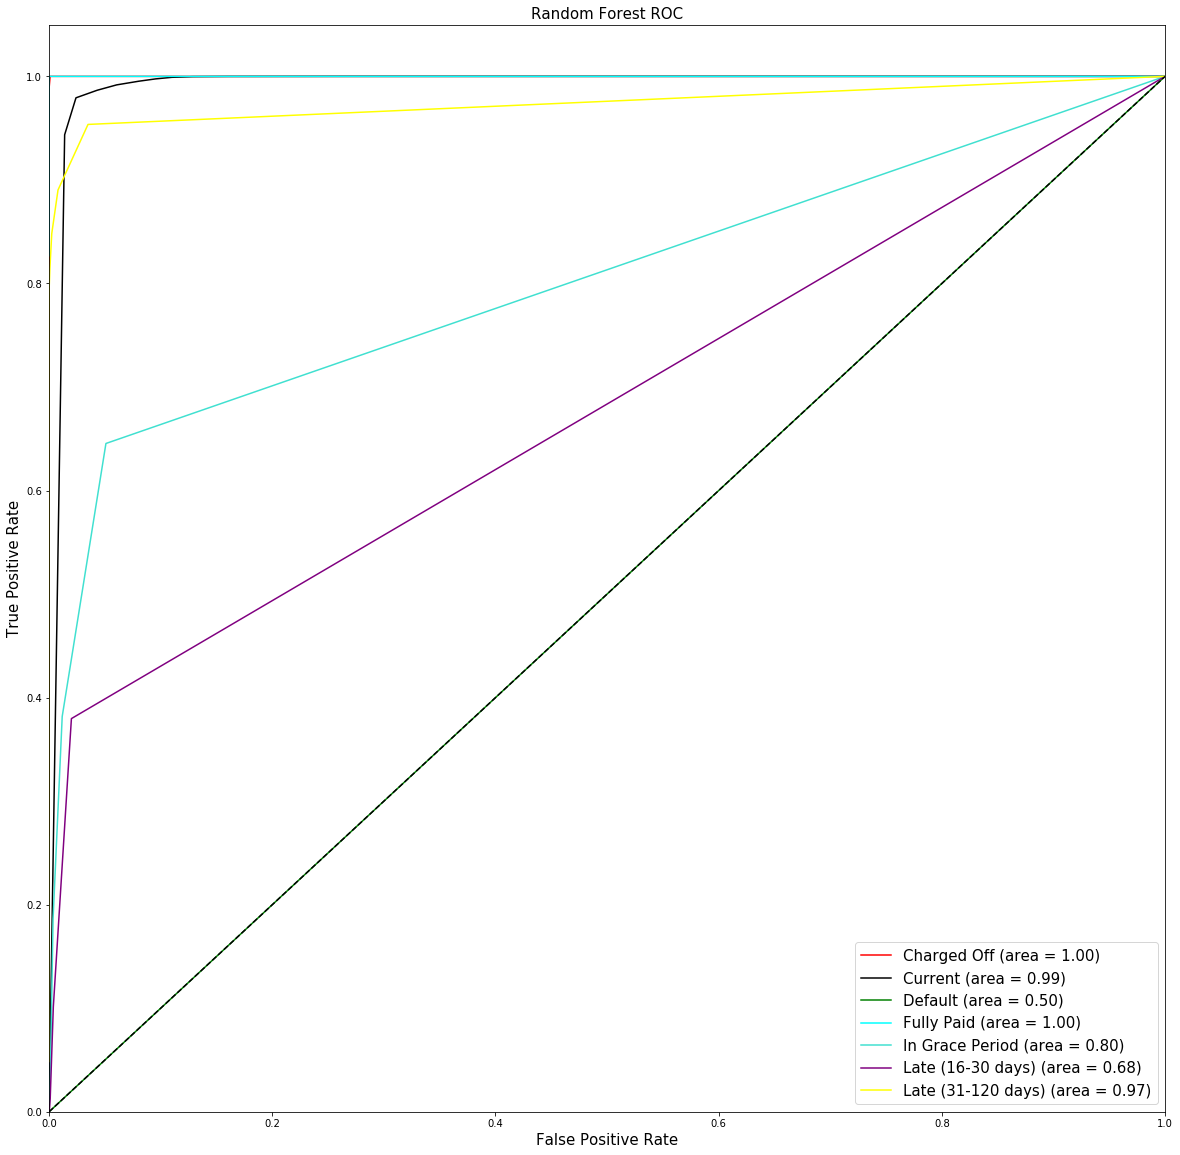

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)']
plt.figure()
color=['red','black','green','cyan','turquoise','purple','yellow']
fig, ax=plt.subplots(figsize = (20,20))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label= '{} (area = %0.2f)'.format(labels[i]) % roc_auc[i],color=color[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Random Forest ROC', fontsize = 15)
plt.legend(loc="lower right", fontsize = 15)

plt.show()
fig.savefig('Random Forest ROC.png')